C:\ProgramData\Anaconda3\envs\solaris\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\envs\solaris\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\envs\solaris\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\envs\solaris\lib\site-packages\tensorflow\

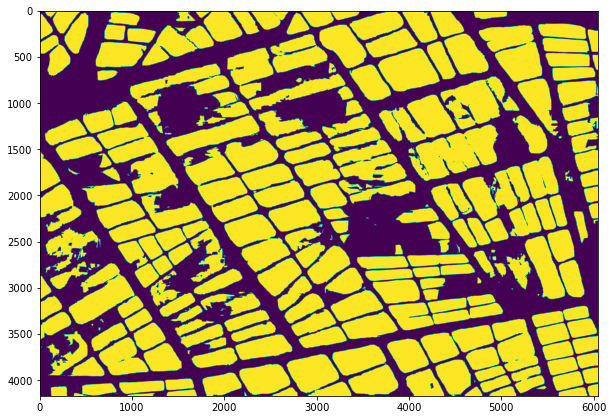

In [1]:
# Run this on the Solaris python environment
import solaris as sol
import os
import skimage
import matplotlib.pyplot as plt

import rasterio
ref_image = rasterio.open(r"E:\PlotDel_Steven\Data\Test\geo_referenced\tile_1.tif")
mask_image_rst = rasterio.open(r"E:\PlotDel_Steven\Data\Test\geo_referenced\tile_1.tif")

mask_image = skimage.io.imread(r"E:\PlotDel_Steven\Data\Test\geo_referenced\tile_1.tif")

geoms = sol.vector.mask.mask_to_poly_geojson(mask_image, channel_scaling=[1, -1, -1])

f, ax = plt.subplots(figsize=(10, 8))
plt.imshow(mask_image)

In [2]:
#Revert the mask to the original crs and affine tranformation for matching.
result_polys = sol.vector.polygon.georegister_px_df(geoms, 
                                                   affine_obj=ref_image.transform, 
                                                   crs=ref_image.crs
                                                   )
#unary_union(result_polys['geometry'])

In [3]:
#Save the results in a shapefile
result_polys.to_file('Vectorised_PlotDelineations_MRCNN.geojson', driver='GeoJSON')

result_polys.to_file("Vectorised_PlotDelineations_MRCNN.shp")